# Análisis Exploratio (EDA)

Preguntas objetivos:

- ¿Qué carreras tienen mayor cantidad de titulados?
- ¿Qué tipo de instituciones generan más titulados?
- A que edad promedio se titula una persona de la educación superior? ### no está la cat edad
- Cual es el porcentaje de alumnos que terminan la carrera en la duración teórica?
- Quién saca más profesionales la RM o regiones?


In [1]:
import pandas as pd

####### Análisis exploratorio de datos #######

### Cargar el dataset ###

titulados_2023= pd.read_excel('C:/Users/janov/Desktop/Datasets/Titulados-Ed-Superior-2023/2023.xlsx')

#Imprime las primeras 5 filas
#print(titulados_2023_Cl.head(5))

print(titulados_2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297174 entries, 0 to 297173
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat_periodo              297174 non-null  int64  
 1   codigo_unico             297174 non-null  object 
 2   mrun                     296708 non-null  float64
 3   gen_alu                  297174 non-null  int64  
 4   fec_nac_alu              297174 non-null  int64  
 5   rango_edad               297174 non-null  object 
 6   anio_ing_carr_ori        297174 non-null  int64  
 7   sem_ing_carr_ori         297174 non-null  int64  
 8   anio_ing_carr_act        297174 non-null  int64  
 9   sem_ing_carr_act         297174 non-null  int64  
 10  nomb_titulo_obtenido     264687 non-null  object 
 11  nomb_grado_obtenido      128331 non-null  object 
 12  fecha_obtencion_titulo   297174 non-null  int64  
 13  tipo_inst_1              297174 non-null  object 
 14  tipo

In [ ]:
# Seleccionar solo las columnas necesarias
columnas_utiles = ["codigo_unico","mrun","gen_alu","fec_nac_alu", "cat_periodo", "anio_ing_carr_act", "nomb_titulo_obtenido", "nomb_carrera", "tipo_inst_1",
                   "dur_total_carr", "dur_estudio_carr", "region_sede", "gen_alu"]

# Filtrar las columnas que existen en el dataframe
columnas_existentes = [col for col in columnas_utiles if col in titulados_2023.columns]

titulados_2023 = titulados_2023[columnas_existentes]

# Contar filas con 'fec_nac_alu' igual a 19000101
#registros_sin_fecha_nac = titulados_2023[titulados_2023['fec_nac_alu'] == 19000101].shape[0]
#print(f"Registros sin información de fecha de nacimiento: {registros_sin_fecha_nac}") ------> 0

from datetime import datetime

# Convertir la columna 'fec_nac_alu' a formato de fecha
titulados_2023['fec_nac_alu'] = pd.to_datetime(titulados_2023['fec_nac_alu'], format='%Y%m')

# Calcular la edad
titulados_2023['edad'] = titulados_2023['fec_nac_alu'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))


# Verificar cambios
print(titulados_2023.info())





Registros sin información de fecha de nacimiento: 0
<class 'pandas.core.frame.DataFrame'>
Index: 297166 entries, 0 to 297173
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   codigo_unico          297166 non-null  object        
 1   mrun                  297166 non-null  float64       
 2   gen_alu               297166 non-null  int64         
 3   gen_alu               297166 non-null  int64         
 4   fec_nac_alu           297166 non-null  datetime64[ns]
 5   cat_periodo           297166 non-null  int64         
 6   anio_ing_carr_act     297166 non-null  int64         
 7   nomb_titulo_obtenido  297166 non-null  object        
 8   nomb_carrera          297166 non-null  object        
 9   tipo_inst_1           297166 non-null  object        
 10  dur_total_carr        297166 non-null  int64         
 11  dur_estudio_carr      297166 non-null  int64         
 12  region_sede

# Inspección inicial de los datos

In [3]:
print(titulados_2023.shape)  # Número de filas y columnas

print("###########################")
print(titulados_2023.info())  # Tipo de datos de cada columna

(297174, 14)
###########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297174 entries, 0 to 297173
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   codigo_unico          297174 non-null  object        
 1   mrun                  296708 non-null  float64       
 2   gen_alu               297174 non-null  int64         
 3   fec_nac_alu           297174 non-null  datetime64[ns]
 4   cat_periodo           297174 non-null  int64         
 5   anio_ing_carr_act     297174 non-null  int64         
 6   nomb_titulo_obtenido  264687 non-null  object        
 7   nomb_carrera          297174 non-null  object        
 8   tipo_inst_1           297174 non-null  object        
 9   dur_total_carr        297174 non-null  int64         
 10  dur_estudio_carr      297174 non-null  int64         
 11  region_sede           297174 non-null  object        
 12  gen_alu          

# Manejo de nulos

In [4]:
print(titulados_2023.isnull().sum())  # Cantidad de valores nulos


codigo_unico                0
mrun                      466
gen_alu                     0
fec_nac_alu                 0
cat_periodo                 0
anio_ing_carr_act           0
nomb_titulo_obtenido    32487
nomb_carrera                0
tipo_inst_1                 0
dur_total_carr              0
dur_estudio_carr            0
region_sede                 0
gen_alu                     0
edad                        0
dtype: int64


In [5]:
titulados_2023['nomb_titulo_obtenido'] = titulados_2023['nomb_titulo_obtenido'].fillna('sin informacion')
titulados_2023['mrun'] = titulados_2023['mrun'].fillna(-1)

# Verificar cambios
print(titulados_2023.isnull().sum())


codigo_unico            0
mrun                    0
gen_alu                 0
fec_nac_alu             0
cat_periodo             0
anio_ing_carr_act       0
nomb_titulo_obtenido    0
nomb_carrera            0
tipo_inst_1             0
dur_total_carr          0
dur_estudio_carr        0
region_sede             0
gen_alu                 0
edad                    0
dtype: int64


# Manejo de duplicados

In [6]:
total_filas = titulados_2023.shape[0]  # Total de filas
duplicados = titulados_2023.duplicated().sum()  # Filas duplicadas

print(f"Total de filas: {total_filas}")
print(f"Filas duplicadas encontradas: {duplicados}")

duplicados = titulados_2023[titulados_2023.duplicated(keep=False)]  # Obtener todas las filas duplicadas


# Eliminar duplicados y mantener solo el primer registro
titulados_2023 = titulados_2023.drop_duplicates()

# Verificar cambios
print(f"Total de filas después de eliminar duplicados: {titulados_2023.shape[0]}")











Total de filas: 297174
Filas duplicadas encontradas: 8
Total de filas después de eliminar duplicados: 297166


# Comprobar Dataset post-limpieza

In [7]:
print(titulados_2023.info())  # Confirmar que no hay valores nulos y tipos de datos correctos
print(titulados_2023.describe())  # Resumen estadístico de las variables numéricas
#print(titulados_2023.head())  # Vista previa del dataset


<class 'pandas.core.frame.DataFrame'>
Index: 297166 entries, 0 to 297173
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   codigo_unico          297166 non-null  object        
 1   mrun                  297166 non-null  float64       
 2   gen_alu               297166 non-null  int64         
 3   fec_nac_alu           297166 non-null  datetime64[ns]
 4   cat_periodo           297166 non-null  int64         
 5   anio_ing_carr_act     297166 non-null  int64         
 6   nomb_titulo_obtenido  297166 non-null  object        
 7   nomb_carrera          297166 non-null  object        
 8   tipo_inst_1           297166 non-null  object        
 9   dur_total_carr        297166 non-null  int64         
 10  dur_estudio_carr      297166 non-null  int64         
 11  region_sede           297166 non-null  object        
 12  gen_alu               297166 non-null  int64         
 13  edad

# Análisis Preguntas objetivos

# ¿Qué carreras tienen mayor cantidad de titulados?

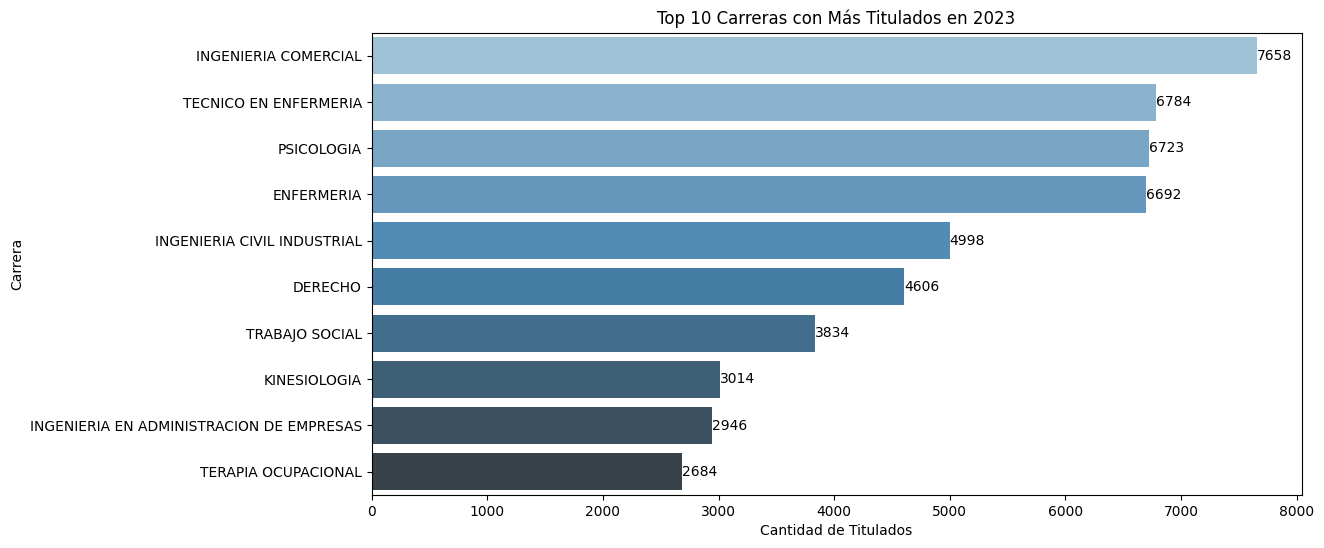

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

top_carreras = titulados_2023["nomb_carrera"].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_carreras.values, y=top_carreras.index, hue=top_carreras.index, palette="Blues_d", dodge=False, legend=False)
plt.xlabel("Cantidad de Titulados")
plt.ylabel("Carrera")
plt.title("Top 10 Carreras con Más Titulados en 2023")

# Agregar etiquetas en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()


# ¿Qué tipo de instituciones generan más titulados?

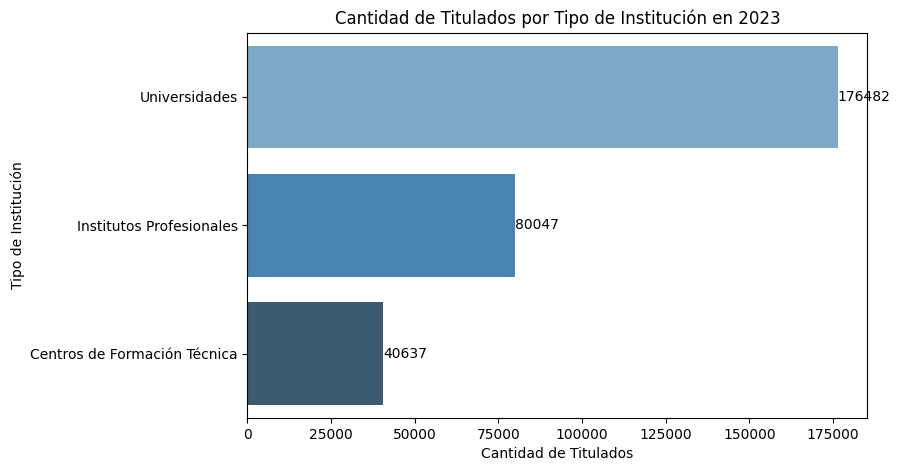

In [9]:
# Reemplazar valores en la columna 'tipo_inst_1'
titulados_2023['tipo_inst_1'] = titulados_2023['tipo_inst_1'].replace('Centros de FormaciÃ³n TÃ©cnica', 'Centros de Formación Técnica')



tipo_inst = titulados_2023["tipo_inst_1"].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=tipo_inst.values, y=tipo_inst.index, palette="Blues_d", hue=tipo_inst.index, legend=False)
plt.xlabel("Cantidad de Titulados")
plt.ylabel("Tipo de Institución")
plt.title("Cantidad de Titulados por Tipo de Institución en 2023")

# Agregar etiquetas en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()


# ¿A qué edad promedio se titula una persona de la educación superior?

Edad promedio de titulación: 31.49 años


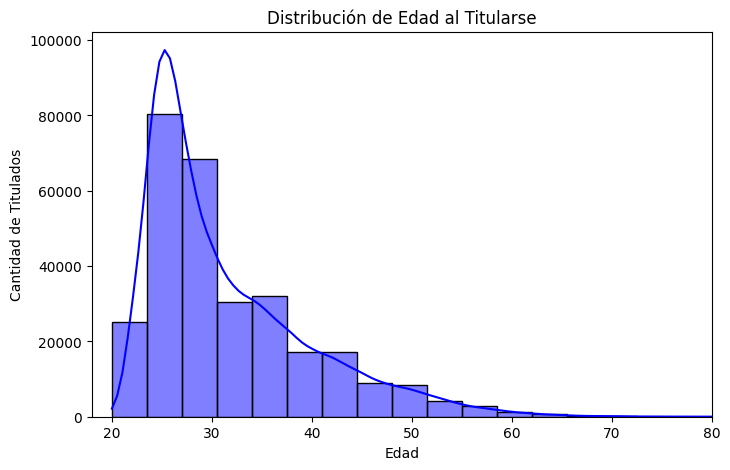

In [15]:
edad_promedio = titulados_2023["edad"].mean()
print(f"Edad promedio de titulación: {edad_promedio:.2f} años")

plt.figure(figsize=(8, 5))
sns.histplot(titulados_2023["edad"], bins=30, kde=True, color="blue")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Titulados")
plt.title("Distribución de Edad al Titularse")
plt.xlim(18, 80)  # Acotar el rango del eje x
plt.show()


#  ¿Quién saca más profesionales: RM o regiones?

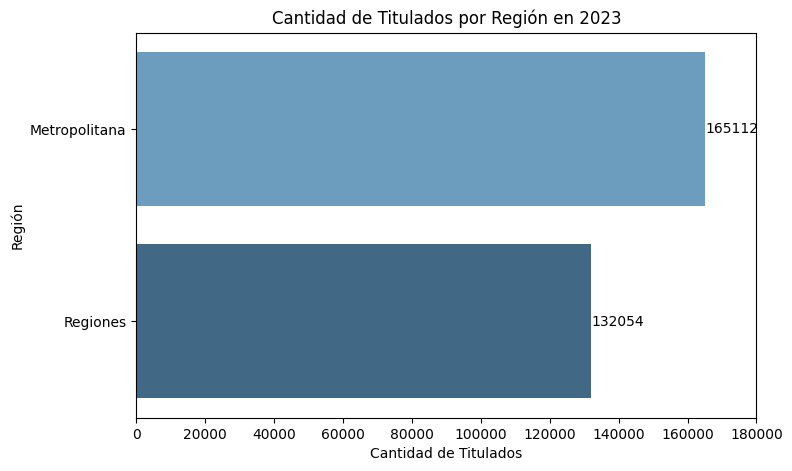

In [23]:
# Agrupar las regiones en "Metropolitana" y "Regiones"
titulados_agrupados = titulados_2023["region_sede"].apply(lambda x: "Metropolitana" if x == "Metropolitana" else "Regiones").value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=titulados_agrupados.values, y=titulados_agrupados.index, palette="Blues_d", hue=titulados_agrupados.index, legend=False)
plt.xlabel("Cantidad de Titulados")
plt.ylabel("Región")
plt.title("Cantidad de Titulados por Región en 2023")
plt.xlim(0, 180000)  # Acotar el rango del eje x

# Agregar etiquetas en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()
